In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# inputs 데이터 생성


X = [[[i+j] for i in range (5)] for j in range (100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [4]:
y = [(i+5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [5]:
X= np.array(X,dtype= float)
y = np.array(y, dtype= float)

X.shape, y.shape

((100, 5, 1), (100,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [8]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))

model_1.add(layers.Dense(1))

model_1.summary()


Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [10]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 3807.6401 - accuracy: 0.0000e+00 - val_loss: 3760.1680 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 3803.2192 - accuracy: 0.0000e+00 - val_loss: 3755.8730 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3799.0398 - accuracy: 0.0000e+00 - val_loss: 3751.4922 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 3794.7566 - accuracy: 0.0000e+00 - val_loss: 3747.1282 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 3790.3784 - accuracy: 0.0000e+00 - val_loss: 3742.8364 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 3786.1804 - accuracy: 0.0000e+00 - val_loss: 3738.4731 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - lo

In [11]:
y_hat = model_1.predict(X_test)

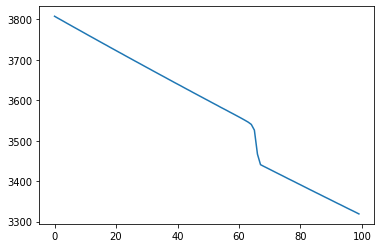

In [12]:
plt.plot(Hist_1.history['loss'])
plt.show()

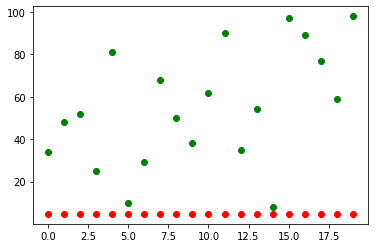

In [14]:
# 학습되지 않음 / 녹색 - 정답(y_test) , 적색 - 예측(y_hat)


plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c= 'r')
plt.show()

In [16]:
X = [[[i+j] for i in range(5)] for j in range(100)]
y = [(i+5) for i in range (100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [17]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [19]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

In [21]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.6574 - accuracy: 0.0125 - val_loss: 0.5790 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5144 - accuracy: 0.0125 - val_loss: 0.4361 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3848 - accuracy: 0.0125 - val_loss: 0.3176 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.0125 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.0125 - val_loss: 0.1622 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.0125 - val_loss: 0.1191 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.0125 - val_loss: 0.0936 - val_accur

In [22]:
y_hat = model_2.predict(X_test)

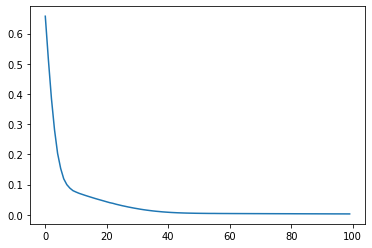

In [23]:
plt.plot(Hist_2.history['loss'])
plt.show()

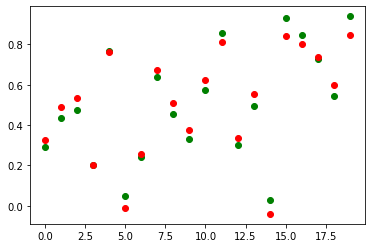

In [24]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

In [25]:
model_3 = models.Sequential(name = 'Stackd_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = True))
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_3.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

In [27]:
Hist_3 = model_3.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 37ms/step - loss: 0.1550 - accuracy: 0.0125 - val_loss: 0.1203 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1155 - accuracy: 0.0125 - val_loss: 0.0881 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0878 - accuracy: 0.0125 - val_loss: 0.0671 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.0125 - val_loss: 0.0537 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.0250 - val_loss: 0.0451 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.0250 - val_loss: 0.0391 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 0.0250 - val_loss: 0.0347 - val_accur

In [28]:
y_hat = model_3.predict(X_test)

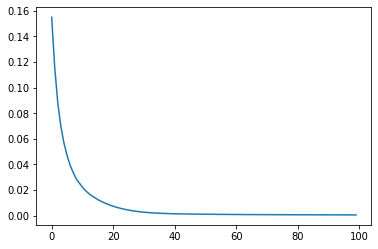

In [29]:
plt.plot(Hist_3.history['loss'])
plt.show()

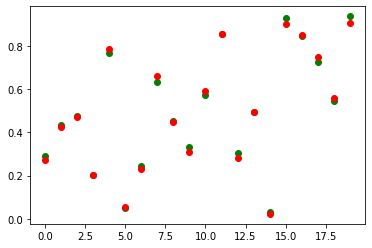

In [30]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

In [31]:
# 'input_length'에 대한 Sequance 전체를 출력할지 설정
# 'False' vs. 'True'

X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [32]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

In [34]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

In [35]:
# 마지막 output만 출력
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [36]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [37]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[ 1.        ,  1.        , -0.99999887]], dtype=float32)

In [38]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [40]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [41]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-1.,  1.,  1.],
        [-1.,  1.,  1.],
        [-1.,  1.,  1.],
        [-1.,  1.,  1.],
        [-1.,  1.,  1.]]], dtype=float32)